# Semester Project - Machine Learning
Project made by Nicolas Gregori SUPSI - 2021

## Dataset description
The current dataset contains parameters about weather in Szeged, a city located in Hungary, between 2006 and 2016. It contains the following columns: 
- **Formatted Date**
- **Summary**  (weather forecast by hour)
- **Precip Type**
- **Temperature** (in Celsius Degrees)
- **Apparent Temperature** (in Celsius Degrees) - It is the apparent temperature perceived by humans
- **Humidity**
- **Wind Speed** (in km/h)
- **Wind Bearing** (degrees)
- **Visibility** (km)
- **Loud Cover**
- **Pressure** (in millibars)
- **Daily Summer** (weather forecast by day)

All the data contained into the dataset were taken every hour.
Also, there are some columns which summarize how was the weather at a precise hour.

Available at: [*Weather in Szeged*](https://www.kaggle.com/budincsevity/szeged-weather/discussion).

## Preliminar operations

Making sure not losing the job done

In [23]:
%autosave 25

Autosaving every 25 seconds


Load the cell below to import all dependencies needed to run the notebook

In [24]:
#Various imports
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
#Defining portion for test pahse
testPortion = 0.4

First step: we have to import the dataset into the notebook and save it into a Dataframe. Then, we show the first rows just to get a first view of it.

In [36]:
#Load the dataset from memory 
dfPath = "./resources/weatherHistory.csv"
resPath = "./results/"
df = pd.read_csv(dfPath)

In [37]:
#Print dataset's head      
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [38]:
#Printing features' information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [39]:
#Getting rows and columns' number
df.shape

(96453, 12)

In [40]:
#Printing some feature's information
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


## Prepocessing phase

Before starting doing some analyses, it is important to prepare the dataset during the preprocessing phase. For example, we can delete irrlevant columns (more details below) and transform discrete features into a more adaptable format:

There are some columns which are particulary useless. For instance, **Loud Cover** data are full of 0's and that makes this column so irrelevant. The same principle is valid for the string(**Daily Summary** and **Summary**) that tells how it's the weather every hour. \

In [41]:
df = df.drop(['Daily Summary', 'Summary', 'Loud Cover'], axis = 1)
df = df.rename(columns = {"Temperature (C)":"Temperature",
                          "Wind Speed (km/h)":"Wind Speed",
                           "Apparent Temperature (C)":"Apparent Temperature",
                            "Visibility (km)":"Visibility",
                            "Wind Bearing (degrees)":"Wind Bearing",
                            "Pressure (millibars)":"Pressure"})


AttributeError: 'DataFrame' object has no attribute 'column'

In [42]:
df.columns

Index(['Formatted Date', 'Precip Type', 'Temperature', 'Apparent Temperature',
       'Humidity', 'Wind Speed', 'Wind Bearing', 'Visibility', 'Pressure'],
      dtype='object')

Now, we are going to take a quick look about data distribution and how features are correlated with each other. Seeing the table below we can start thinking what kinds of analyses could be interesting to make.

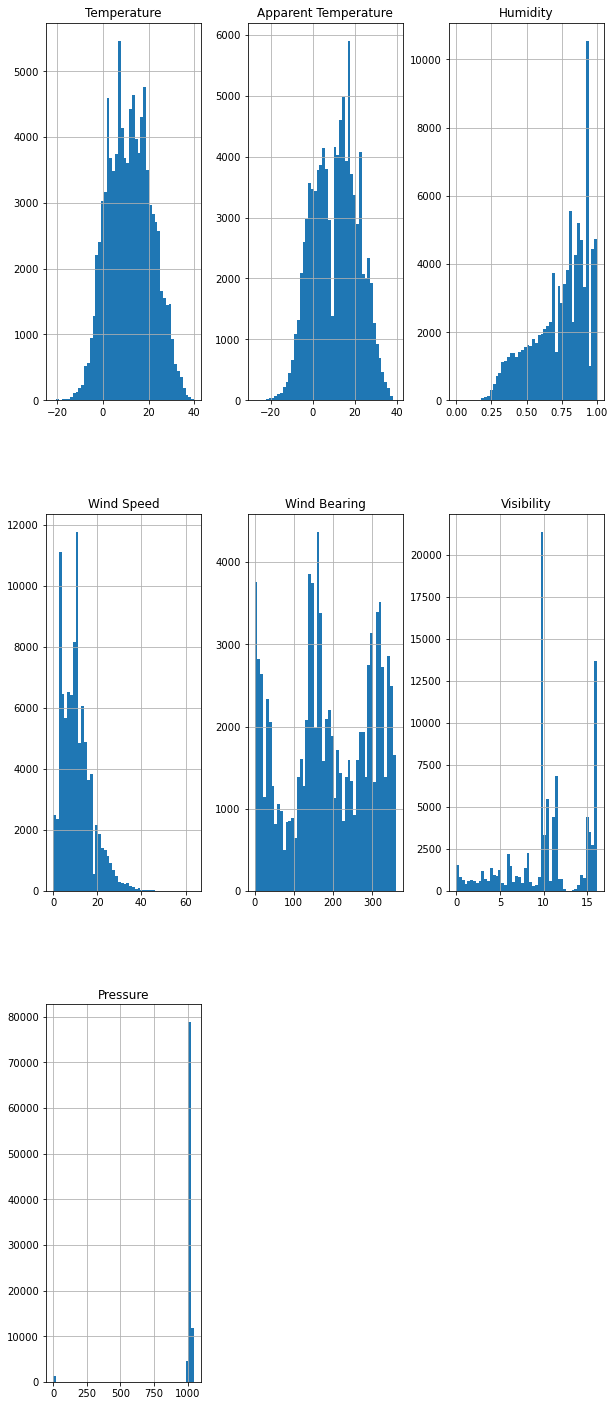

In [10]:
#Print data distribution
df.hist(bins = 50, figsize = (10,25))
plt.show()

In [11]:
df.corr()

,Temperature,Apparent Temperature,Humidity,Wind Speed,Wind Bearing,Visibility,Pressure
Temperature,1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature,0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed,0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing,0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility,0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure,-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


In order to avoid to have **nan**, we convert this values in column **Precip Type** into other

In [45]:
df = df.replace(np.nan, 'other', regex=True)
set(df["Precip Type"].values)

{'other', 'rain', 'snow'}

For further utility we print the box plot of the precitapion types taken hourly

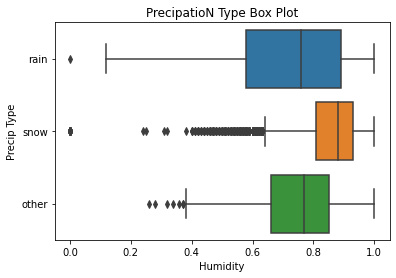

In [46]:
sns.boxplot(x =  df["Humidity"],y = df["Precip Type"])
plt.title("PrecipatioN Type Box Plot")
plt.show()

In [47]:
#Optional: parse the date into a proper format and extract the respective Year,Month,Day and HouR
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], format='%Y-%m-%d %H:%M:%S.%f %z') 
df['Year'] = df['Formatted Date'].apply(lambda x: x.year)
df['Month'] = df['Formatted Date'].apply(lambda x: x.month)
df['Day'] = df['Formatted Date'].apply(lambda x: x.day)
df['Hour'] = df['Formatted Date'].apply(lambda x: x.hour)

In [48]:
df

,Formatted Date,Precip Type,Temperature,Apparent Temperature,Humidity,Wind Speed,Wind Bearing,Visibility,Pressure,Year,Month,Day,Hour
0,2006-04-01 00:00:00+02:00,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,4,1,0
1,2006-04-01 01:00:00+02:00,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,4,1,1
2,2006-04-01 02:00:00+02:00,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1,2
3,2006-04-01 03:00:00+02:00,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1,3
4,2006-04-01 04:00:00+02:00,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00+02:00,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,2016,9,9,19
96449,2016-09-09 20:00:00+02:00,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,2016,9,9,20
96450,2016-09-09 21:00:00+02:00,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,2016,9,9,21
96451,2016-09-09 22:00:00+02:00,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,2016,9,9,22


The regressions and classificatons done below were done using **scikit-learn**, a powerful library in Python used for Machine Learnin and Statistics. Before see the results that I have obtained, it's necessary to split the dataset into two differents:
- Train set: used to train all classifiers and regressors;
- Test set: used to tests all classifers and regressors prepared;

In [49]:
#Splitting the dataset into train, and test dataset
[dfTrain,dfTest] = train_test_split(df.drop(['Formatted Date','Year','Month','Day'],axis=1),random_state=1234,test_size=testPortion) 

## Predicting Temperature  basing on Humidity

First of all let's start doing a simple Linear Regression. Our aim is to minimize as soon as possible the **RMSE** (Residual  Minimum Squared Error) computed as the mean of the differences between real and predicted values. Let's find out if **Temperature** and **Humidity** are correllated each other.

In [50]:
xTrain = dfTrain["Humidity"].values
xTest  = dfTest["Humidity"].values
yTrain = dfTrain["Temperature"].values
yTest  = dfTest["Temperature"].values

xTrain = np.reshape(xTrain,(-1,1))
xTest = np.reshape(xTest,(-1,1))

In [51]:
linReg = LinearRegression()
linReg.fit(xTrain,yTrain)

LinearRegression()

In [52]:
#Print reg params
print(f"Intercepts:  {linReg.intercept_}")
print(f"Coefficients:  {linReg.coef_}")

Intercepts:  34.671419460194286
Coefficients:  [-30.96347094]


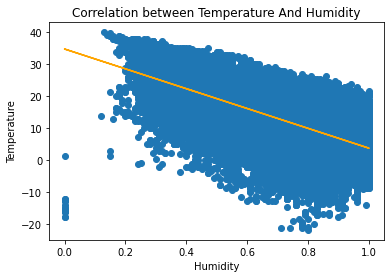

In [53]:
yTestPredicted = linReg.predict(xTest)
plt.scatter(xTrain,yTrain)
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title("Correlation between Temperature And Humidity")
plt.plot(xTest,yTestPredicted,color="orange")
plt.show()

In [54]:
print("RMSE test set: ",np.sqrt(mean_squared_error(yTest,yTestPredicted)))
print("R^2 score: ",linReg.score(xTest,yTest))

RMSE test set:  7.393057970127397
R^2 score:  0.3990707303279296


The $R^2$, is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It is a statist that tell us the quality of a regressor

The chart above shows the best "line" that approxes all the points. Unfortunatley we have a score of 40%, so it is not a good regression. It seems that **Humidity** pass perfectly trough the points, but this is an illusion because the chart is fitted with a lot of points.

## Predicting Apparent Temperature every hour
The apparent temperature is the temperature perceived by humans, caused by the combined effect of air temperature, relative temperature and wind speed. Mostly, it is applied on outdoor perceived temperature. Is it that these features have a great correlation? \
Let's find out.

In [104]:
xData = df[["Temperature","Humidity","Wind Speed"]].values
yData = df["Apparent Temperature"].values

In [105]:
#Take data needed
xTrain = dfTrain[["Temperature","Humidity","Wind Speed"]].values
yTrain = dfTrain["Apparent Temperature"].values

xTest = dfTest[["Temperature","Humidity","Wind Speed"]].values
yTest = dfTest["Apparent Temperature"].values

In [106]:
#Prepare Linear Regressior
linReg = LinearRegression()
linReg.fit(xTrain,yTrain)
print(f"Intercepts:  {linReg.intercept_}")
print(f"Coefficients:  {linReg.coef_}")

Intercepts:  -2.3331653308953335
Coefficients:  [ 1.12579598  1.05095834 -0.09460986]


In [107]:
#Checking how regressior behaviours with dfTest
yTrainPredicted = linReg.predict(xTrain)
RMSETrain = np.sqrt(mean_squared_error(yTrain,yTrainPredicted))
print(f"RMSE train set: {RMSETrain}")

RMSE train set: 1.0787056503099857


In [108]:
yTestPredicted = linReg.predict(xTest)

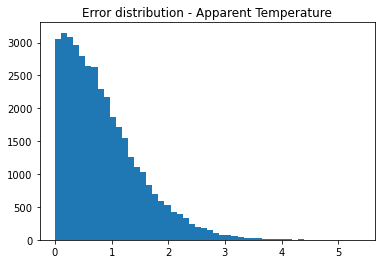

In [109]:
#Show errors distribution
errors = np.abs(yTestPredicted - yTest)
plt.figure()
plt.title("Error distribution - Apparent Temperature")
plt.hist(x = errors, bins = 50)
plt.show()

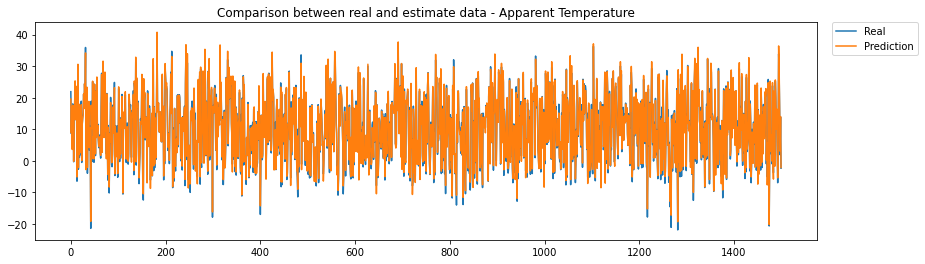

In [110]:
#Show trend between real and predicted (based on a sample of 1500 units)
plt.figure(figsize=(14, 4))
plt.title("Comparison between real and estimate data - Apparent Temperature")
plt.plot(yTest[0:1500], label='Real')
plt.plot(yTestPredicted[0:1500], label='Prediction')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [111]:
#Try to predict "real" data
RMSETest = np.sqrt(mean_squared_error(yTest,yTestPredicted))
R2Test = linReg.score(xTest,yTest)
print(f"RMSE score test: {RMSETest}")
print(f"R2 score test: {R2Test}")

RMSE score test: 1.0822567412636568
R2 score test: 0.989796357182796


In conclusion, it's a evidence that they have a great correlation. The regression is abled to explain the 98% of all instances. So, there is no reason to try improving its quality through other algorithms. We can also save result in a txt file executing the cell below.

In [112]:
#Save prediction's data
np.savetxt(resPath + "Apparent Temperature - Predictions",yTestPredicted)

## Predicting Atmospheric Pressure - Ridge and Lasso Regression
Let's try predicting Pressure using all relevant columns. This predictions will be done using Ridge and Lasso regression.

In [113]:
targetColumn = ["Pressure"]
predictors = list(set(list(df.drop(['Formatted Date','Month','Day','Year','Hour','Precip Type'],axis = 1))) 
                  - set(targetColumn))
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10]
params = {'alpha': alpha}

Xs = dfTrain[predictors].values
Ys = dfTrain[targetColumn].values

xTest = dfTest[predictors].values
yTest = dfTest["Pressure"].values


Define the number of folder used for GridSearchCV

In [114]:
cv = 5

   ### Ridge Regression

In [115]:
ridge = Ridge()
ridgeReg = GridSearchCV(ridge,params,scoring='neg_mean_squared_error', cv = cv, verbose=1)
ridgeReg.fit(Xs,Ys)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.2s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [116]:
ridgeReg.best_params_

{'alpha': 10}

In [117]:
ridgeReg.best_score_

-13718.19846511773

In [118]:
yTestRidgePredicted = ridgeReg.predict(xTest)

In [119]:
ridgeError = np.sqrt(mean_squared_error(yTest,yTestRidgePredicted))
print(f"RMSE score: {ridgeError}")

RMSE score: 116.29020092558753


### Lasso Regression

In [120]:
lasso = Lasso()
lassoReg = GridSearchCV(lasso,params,scoring='neg_mean_squared_error', cv= cv, verbose=1)
lassoReg.fit(Xs,Ys)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Notebook\anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 319308011.18365693, tolerance: 64418.168653511624
  model = cd_fast.enet_coordinate_descent(
C:\Users\Notebook\anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310490927.4416188, tolerance: 62602.85688321182
  model = cd_fast.enet_coordinate_descent(
C:\Users\Notebook\anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 314833187.24347764, tolerance: 63513.584163245694
  mo

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.0s finished
C:\Users\Notebook\anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 394659015.8510821, tolerance: 79589.98641307955
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [121]:
lassoReg.best_params_

{'alpha': 1e-15}

In [122]:
lassoReg.best_score_

-13718.200777568496

In [123]:
yTestLassoPredicted = lassoReg.predict(xTest)

In [74]:
lassoError = np.sqrt(mean_squared_error(yTest,yTestLassoPredicted))
print(f"RMSE score: {lassoError}")

RMSE score: 116.52281301076783


We can observe that Ridge and Lasso via **GridSearchCV** obtain the diffent RMSE results.

### Elastic Net Regression

The **elastic net** is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods. We may be able to get the same score with a small alpha. Let's find it out.

In [75]:
elasticNet = ElasticNet()
elasticReg = GridSearchCV(elasticNet,params,scoring="neg_mean_squared_error",cv = cv, verbose = 1)
elasticReg.fit(Xs,Ys)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Notebook\anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 313693457.6578068, tolerance: 63213.63056903937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Notebook\anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 305260137.2252812, tolerance: 61499.71079985987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Notebook\anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 305807027.0601071, tolerance: 61608.30682170687
  model 

C:\Users\Notebook\anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125557.73769176006, tolerance: 61608.30682170687
  model = cd_fast.enet_coordinate_descent(
C:\Users\Notebook\anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116835.06553149223, tolerance: 65023.634564212574
  model = cd_fast.enet_coordinate_descent(
C:\Users\Notebook\anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132766.35574901104, tolerance: 65029.05605171954
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=1)]: Done  45 out of  45 

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [76]:
elasticReg.best_params_

{'alpha': 0.001}

In [77]:
elasticReg.best_score_

-13568.293241715637

In [78]:
yTestElasticNetPredicted = elasticReg.predict(xTest)

In [80]:
#Print ElasticNet error
elasticError = np.sqrt(mean_squared_error(yTest,yTestElasticNetPredicted))
print(f"RMSE score: {elasticError}")

RMSE score: 116.5226589737135


Via **ElasticNet** regolarization we obtain a small alpha with the same best score.

## Predicting Weather type basing on Humidity - K NeighborsClassifier

We start with classification analyses. Classification is a supervised learning concept which basically categorizes a set of data into classes. 

In [81]:
#Drop Precip Type columns with other value cause we have few samples tho predict
df = df.drop(df[df["Precip Type"] == "other"].index)
set(df["Precip Type"])

{'rain', 'snow'}

In [82]:
#Divide again the dataset int train and test
dfTrain,dfTest = train_test_split(df,random_state=1234,test_size= testPortion)

In [83]:
xTrain = dfTrain["Humidity"].values
yTrain = dfTrain["Precip Type"].values
xTest = dfTest["Humidity"].values
yTest = dfTest["Precip Type"].values

In [84]:
#Normalize Humidity values
scaler = StandardScaler()

xTrain = np.reshape(xTrain,(-1,1))
xTest = np.reshape(xTest,(-1,1))

scaler.fit(xTrain)
xTrainScaled = scaler.transform(xTrain)
xTestScaled = scaler.transform(xTest)

In [85]:
weatherClassifier =  KNeighborsClassifier(n_neighbors = 3)
weatherClassifier.fit(xTrainScaled,yTrain)

KNeighborsClassifier(n_neighbors=3)

In [86]:
yWeatherPredicted = weatherClassifier.predict(xTest)

In [87]:
#Printing some statistic like Confusion Matrix and a Classification Report
print("Confusion matrix: ")
print(confusion_matrix(yTest,yWeatherPredicted))
print("Classification report: ")
print(classification_report(yTest,yWeatherPredicted))
print(f"Accuracy: {weatherClassifier.score(xTestScaled,yTest)}")

Confusion matrix: 
[[25616  8435]
 [ 3358   966]]
Classification report: 
              precision    recall  f1-score   support

        rain       0.88      0.75      0.81     34051
        snow       0.10      0.22      0.14      4324

    accuracy                           0.69     38375
   macro avg       0.49      0.49      0.48     38375
weighted avg       0.80      0.69      0.74     38375

Accuracy: 0.8252508143322476


Looking the confusion matrix we can see that we have an high prediction about  **rain** category. Instead **snow** category is non predicted so good cause we haven't got enough samples

Now, we want to see another statistic: the **ROC** curve. An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

    True Positive Rate
    False Positive Rate
But before, via **LabelEncoder** we have to trasform the categoric variable(Precip Type) into discrete values.

In [88]:
le = LabelEncoder()
yTestDiscreteValues = le.fit_transform(yTest)
yTestDiscreteValues

array([0, 0, 0, ..., 1, 0, 0])

After the conversion done above, the variabile becomes binary with the following meanings:
- 0 stands for **rain**
- 1 stands for **snow**

Referring to **ROC curve** it is alsto interesting look the **AUC**.
Instead, **AUC** stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

In [89]:
#Compute ROC and AUC
probs =  weatherClassifier.predict_proba(xTest)
preeds = probs[:,1]
fpr,tpr,threshold = roc_curve(yTestDiscreteValues,preeds)

rocAuc = auc(fpr,tpr)

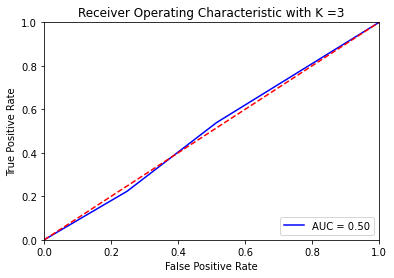

In [94]:
#Plot ROC curve
plt.title('Receiver Operating Characteristic with K =3')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % rocAuc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Now we try to predict  the best case, unless  if there would be another one. We start computing the classifier error for each K until 34

In [91]:
#CELL A BIT SLOW TO RUN
errorsClassifiers = list()
for i in range (1,35):
    weatherClassifier =  KNeighborsClassifier(n_neighbors=i)
    weatherClassifier.fit(xTrainScaled,yTrain)
    yPredict = weatherClassifier.predict(xTest)
    errorsClassifiers.append(np.mean(yTest != yPredict))

Text(0, 0.5, 'K mean error')

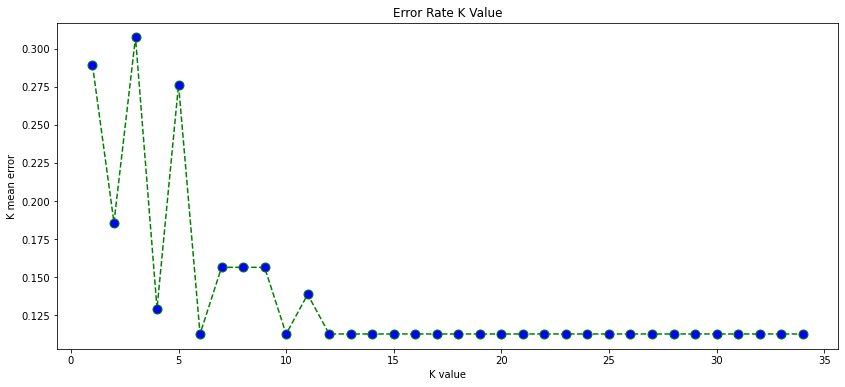

In [92]:
#Plot error classifier  for each K
plt.figure(figsize =(14,6))
plt.plot(range(1,35), errorsClassifiers, color = "green", linestyle="dashed", marker="o", 
         markerfacecolor='blue', markersize=9)
plt.title("Error Rate K Value")
plt.xlabel("K value")
plt.ylabel("K mean error")

Observing the chart we can figure out that the best *K* is 12, but anyway it is not a good classifier. So, now we want trying improve our classificator using SVM.

## Predicting Weather type basing on Humidity - SVM

At last, we want to improve the analyse done before using **SVM** (support vector machine). They are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis. 

Before, we define a functio that compute the bet iperparamteres using **GridSearchCV**. To make a comparison we want to use two different kernels:
- Linear
- RBF

In [95]:
def compute_SVM(classfier,params,n_folds,Xs,Ys):
    gscv = GridSearchCV(classfier,params,cv = n_folds)
    gscv.fit(Xs,Ys)
    print("Params combination: \n",gscv.cv_results_['params'])
    print('Avg accuracy per combination:\n', gscv.cv_results_['mean_test_score'])
    print('Best combination:\n', gscv.best_params_)
    print('Avg accuracy of best combination: {}'.format(gscv.best_score_))
    return gscv

In [96]:
#Prepare SVC's 
n_folds = 3
clsLinear = SVC()
clsRBF = SVC()

paramGridLinearSVC = [{'kernel': ['linear'], 'C': [1, 5, 10]}]
paramGridRBFSVC =  [{'kernel': ['rbf'], 'C': [1, 5, 10], 'gamma': [0.1, 0.01]}]

In [97]:
#CELL A BIT SLOW TO RUN
gscvLinear = compute_SVM(clsLinear,paramGridLinearSVC,n_folds,xTrain,yTrain)

Params combination: 
 [{'C': 1, 'kernel': 'linear'}, {'C': 5, 'kernel': 'linear'}, {'C': 10, 'kernel': 'linear'}]
Avg accuracy per combination:
 [0.88902208 0.88902208 0.88902208]
Best combination:
 {'C': 1, 'kernel': 'linear'}
Avg accuracy of best combination: 0.889022080922847


In [98]:
#CELL A BIT SLOW TO RUN 
gscvRBF = compute_SVM(clsRBF,paramGridRBFSVC,n_folds,xTrain,yTrain)

Params combination: 
 [{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}, {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}, {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}]
Avg accuracy per combination:
 [0.88902208 0.88902208 0.88902208 0.88902208 0.88902208 0.88902208]
Best combination:
 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Avg accuracy of best combination: 0.889022080922847


In conclusion, we can say that using **SVM** we are able to increase the accuracy of our regressor of 89%, instead 82% (value obtained with KNeighbors), but obvsiously accuracy is not a reliable statistic in the best case because it's much better to consider how many values of a determined class will be predicted correctly.